## Level1 Kaggle ML

In [1]:
import pandas as pd

In [42]:
# save filepath to variable for easier access
melbourne_file_path = './data/melb_data.csv'
# read the data and store data in DataFrame titled melbourne_data
melbourne_data = pd.read_csv(melbourne_file_path) 
# print a summary of the data in Melbourne data
# melbourne_data.describe()

In [3]:
# print the list of columns
# melbourne_data.columns

## Handle String Type Features

In [43]:
# Count Number of Unique Values a column or feature can have
typ = melbourne_data.dtypes
i = 0
cols_to_drop = []
for col in melbourne_data.columns:
    unq = melbourne_data[col].nunique()
    if typ[i]=='object' and unq>100:
        cols_to_drop.append(col)
#     print(col, unq, typ[i])
    i += 1
print(cols_to_drop)

melbourne_data = melbourne_data.drop(cols_to_drop, axis=1)

['Suburb', 'Address', 'SellerG']


In [44]:
# melbourne_data.head(20)
# one hot encode values
melbourne_data = pd.get_dummies(melbourne_data, drop_first=True)
# melbourne_data.columns
# melbourne_data.head(20)
print(type(melbourne_data))

<class 'pandas.core.frame.DataFrame'>


## Impute NA values

In [74]:
# missing_val_count_by_column = (melbourne_data.isnull().sum())
# print(missing_val_count_by_column)
# print(melbourne_data.dtypes)

In [45]:
# Impute Values
melbourne_data.fillna(melbourne_data.mean(), inplace=True)
# from sklearn.preprocessing import Imputer
# my_imputer = Imputer()
# melbourne_data = my_imputer.fit_transform(melbourne_data)
print(type(melbourne_data))

<class 'pandas.core.frame.DataFrame'>


In [16]:
# melbourne_data.dropna(axis=0)
# print(melbourne_data.isnull().sum())

Rooms                                    0
Price                                    0
Distance                                 0
Postcode                                 0
Bedroom2                                 0
Bathroom                                 0
Car                                      0
Landsize                                 0
BuildingArea                             0
YearBuilt                                0
Lattitude                                0
Longtitude                               0
Propertycount                            0
Type_h                                   0
Type_t                                   0
Type_u                                   0
Method_PI                                0
Method_S                                 0
Method_SA                                0
Method_SP                                0
Method_VB                                0
Date_1/07/2017                           0
Date_10/09/2016                          0
Date_10/12/

In [17]:
# our target variable
y = melbourne_data.Price

In [18]:
# list of features that we want for our model
# melbourne_features =

In [19]:
# our input data
X = melbourne_data.drop(['Price'], axis=1)

In [20]:
X.describe()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
count,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,...,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000,13580.000000
mean,2.937997,10.137776,3105.301915,2.914728,1.534242,1.610075,558.416127,151.967650,1964.684217,-37.809203,...,0.047644,0.001325,0.108321,0.003903,0.286451,0.003019,0.033137,0.345729,0.217084,0.002356
std,0.955748,5.868725,90.676964,0.965921,0.691712,0.960433,3990.669241,392.002962,28.972246,0.079260,...,0.213019,0.036384,0.310797,0.062353,0.452119,0.054866,0.179001,0.475623,0.412275,0.048487
min,1.000000,0.000000,3000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1196.000000,-38.182550,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,6.100000,3044.000000,2.000000,1.000000,1.000000,177.000000,122.000000,1960.000000,-37.856822,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.000000,9.200000,3084.000000,3.000000,1.000000,2.000000,440.000000,151.967650,1964.684217,-37.802355,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,3.000000,13.000000,3148.000000,3.000000,2.000000,2.000000,651.000000,151.967650,1975.000000,-37.756400,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,10.000000,48.100000,3977.000000,20.000000,8.000000,10.000000,433014.000000,44515.000000,2018.000000,-37.408530,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [21]:
X.head()

,Rooms,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,...,CouncilArea_Yarra,CouncilArea_Yarra Ranges,Regionname_Eastern Metropolitan,Regionname_Eastern Victoria,Regionname_Northern Metropolitan,Regionname_Northern Victoria,Regionname_South-Eastern Metropolitan,Regionname_Southern Metropolitan,Regionname_Western Metropolitan,Regionname_Western Victoria
0,2,2.5,3067.0,2.0,1.0,1.0,202.0,151.96765,1964.684217,-37.7996,...,1,0,0,0,1,0,0,0,0,0
1,2,2.5,3067.0,2.0,1.0,0.0,156.0,79.00000,1900.000000,-37.8079,...,1,0,0,0,1,0,0,0,0,0
2,3,2.5,3067.0,3.0,2.0,0.0,134.0,150.00000,1900.000000,-37.8093,...,1,0,0,0,1,0,0,0,0,0
3,3,2.5,3067.0,3.0,2.0,1.0,94.0,151.96765,1964.684217,-37.7969,...,1,0,0,0,1,0,0,0,0,0
4,4,2.5,3067.0,3.0,1.0,2.0,120.0,142.00000,2014.000000,-37.8072,...,1,0,0,0,1,0,0,0,0,0


In [22]:
from sklearn.model_selection import train_test_split

# split data into training and validation data, for both features and target
train_X, val_X, train_y, val_y = train_test_split(X, y, random_state = 0)

In [23]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model on training data
melbourne_model.fit(train_X, train_y)

DecisionTreeRegressor(criterion='mse', max_depth=None, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=1, splitter='best')

In [24]:
# make prediction on validation data
val_predictions = melbourne_model.predict(val_X)

In [28]:
from sklearn.metrics import mean_absolute_error

print(mean_absolute_error(val_predictions, val_y))

236414.53343151693


In [29]:
def get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y):
    model = DecisionTreeRegressor(max_leaf_nodes=max_leaf_nodes, random_state=0)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    mae = mean_absolute_error(val_y, preds_val)
    return(mae)

In [30]:
# compare MAE with differing values of max_leaf_nodes
for max_leaf_nodes in [5, 50, 500, 5000]:
    my_mae = get_mae(max_leaf_nodes, train_X, val_X, train_y, val_y)
    print("Max leaf nodes: %d  \t\t Mean Absolute Error:  %d" %(max_leaf_nodes, my_mae))

Max leaf nodes: 5  		 Mean Absolute Error:  320131
Max leaf nodes: 50  		 Mean Absolute Error:  242465
Max leaf nodes: 500  		 Mean Absolute Error:  222008
Max leaf nodes: 5000  		 Mean Absolute Error:  233819


In [31]:
from sklearn.ensemble import RandomForestRegressor

forest_model = RandomForestRegressor(random_state=1)
forest_model.fit(train_X, train_y)
melb_preds = forest_model.predict(val_X)
print(mean_absolute_error(val_y, melb_preds))

c:\program files (x86)\python35-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


173586.3250073638


## Level 2 Kaggle ML

## Using XGBoost boosts our prediction accuracy

In [32]:
from xgboost import XGBRegressor
xg_model = XGBRegressor(n_estimators=5000, learning_rate=0.01, max_depth=8)
xg_model.fit(train_X, train_y, early_stopping_rounds=10, eval_set=[(val_X, val_y)], verbose=False)
xg_pred = xg_model.predict(val_X)
print(mean_absolute_error(val_y, xg_pred))

157841.9854841679


### Partial Dependence Plots

In [33]:
from sklearn.ensemble import GradientBoostingRegressor

# scikit-learn originally implemented partial dependence plots only for Gradient Boosting models
# this was due to an implementation detail, and a future release will support all model types.
my_model = GradientBoostingRegressor()
# fit the model as usual
my_model.fit(train_X, train_y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=100, n_iter_no_change=None, presort='auto',
             random_state=None, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

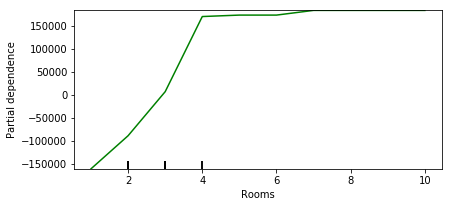

In [35]:
from sklearn.ensemble.partial_dependence import partial_dependence, plot_partial_dependence
# Here we make the plot
my_plots = plot_partial_dependence(my_model,       
                                   features=[0], # column numbers of plots we want to show
                                   X=X,            # raw predictors data.
                                   feature_names=['Rooms', 'Landsize', 'Regionname'], # labels on graphs
                                   grid_resolution=10) # number of values to plot on x axis

In [36]:
gb_pred = my_model.predict(val_X)
print(mean_absolute_error(val_y, gb_pred))

184118.5374635351


## Using Pipelines

In [53]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

my_pipeline = make_pipeline(SimpleImputer(), RandomForestRegressor(random_state=1))

In [54]:
my_pipeline.fit(train_X, train_y)
predictions = my_pipeline.predict(val_X)

c:\program files (x86)\python35-32\lib\site-packages\sklearn\ensemble\forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


In [55]:
print(mean_absolute_error(predictions, val_y))

173586.3250073638


## Using Cross Validation

In [57]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(my_pipeline, X, y, scoring='neg_mean_absolute_error', cv=5)
print(scores)

[-212280.19712813 -202200.14602356 -194481.38718704 -162904.10283505
 -166542.96321797]
